In [4]:
#Imports

import pandas as pd


In [5]:
# List of CSV files
csv_files = ['metro-trips-2023-q1.csv', 'metro-trips-2023-q2.csv', 'metro-trips-2023-q3.csv', 'metro-trips-2023-q3.csv']

# Create an empty list to store data frames
dfs = []

# Read each CSV file and append its data frame to the list
for file in csv_files:
    dfs.append(pd.read_csv(file, dtype={'bike_id': str}))




       total_trips  avg_trip_duration
month                                
1            23343          30.424410
2            24073          30.551074
3            24813          32.266473
4            30879          34.500761
5            39052          31.408481
6            39505          35.597089
7            81642          37.805149
8            83660          35.933732
9            96204          31.808428


<Figure size 1000x600 with 0 Axes>

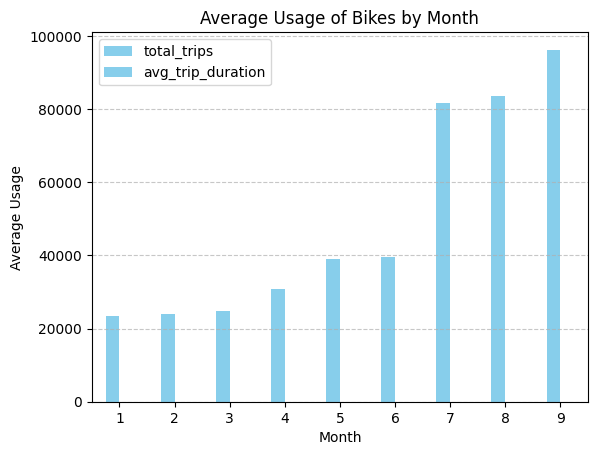

In [12]:
# Average usage of bikes
import matplotlib.pyplot as plt

combined_df = pd.concat(dfs, ignore_index=True)

# Convert 'start_time' column to datetime objects if it's not already in that format
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])

# Extract month from 'start_time' and create a new column for it
combined_df['month'] = combined_df['start_time'].dt.month

# Group the data by month and calculate the number of trips and average trip duration
monthly_summary = combined_df.groupby('month').agg(
    total_trips=('trip_id', 'count'),
    avg_trip_duration=('duration', 'mean')
)
print(monthly_summary)

# Plot the data
plt.figure(figsize=(10, 6))
monthly_summary.plot(kind='bar', color='skyblue')
plt.title('Average Usage of Bikes by Month')
plt.xlabel('Month')
plt.ylabel('Average Usage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
